#Denoising using Gaussian

It is technically Blurring the image by removing noises...Which is prerequisite to many filters and this is known as Gaussian Smoothing.

**<u>Convolution</u>:-**       
<img src='https://miro.medium.com/max/1400/1*O06nY1U7zoP4vE5AZEnxKA.gif' width=50%>

In [49]:
#%pip install scipy

In [50]:
# We will need convolution 2D filter from Scipy's signal module
from scipy.signal import convolve2d

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import cv2 library - doesn't need installation using google colab
import cv2


In [52]:
# Generate your kernel/filter
kernel = np.ones((3,3))/9

In [53]:
# Let's see how it looks
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [54]:
# Create a gaussian kernel
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

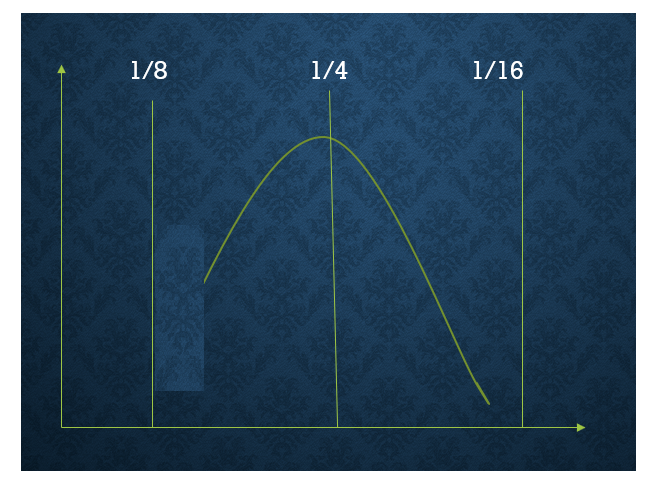

In [55]:
from astroquery.skyview import SkyView


In [56]:
# Get the Andromeda data (M31) from SDSSg Survey using SkyView
hdu=SkyView.get_images("M31","SDSSg")[0][0]
M31_Pixels=hdu.data

In [57]:
# Get the convolution done using our kernel
convolved_image = convolve2d(M31_Pixels, kernel, mode='same')

In [58]:
# Convolution done using gaussian kernel
gaussian_convolved_image = convolve2d(M31_Pixels, gaussian_kernel, mode='same')


In [59]:
# A Common Function that will be used to plot the scaled pixel arrays
def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color, weight='bold')
  plt.axis('off')

In [60]:
# function to compaare pixel after scalingg
def compare_pixels(scaled_array, title):
  plt.subplot(1, 2, 1)
  plot_pixels(M31_Pixels, title='Original Image', color='black')
  plt.subplot(1, 2, 2)
  plot_pixels(scaled_array, title=title, color='royalblue')
  plt.tight_layout()
  plt.show()

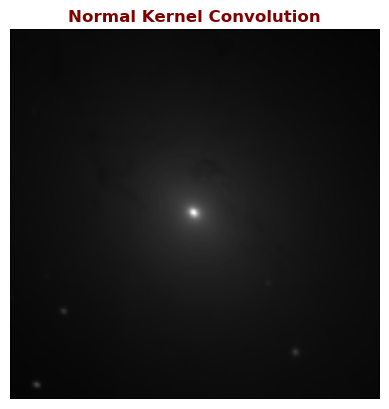

In [61]:
# Vizulaise the first kernel convolution
plot_pixels(convolved_image, title='Normal Kernel Convolution', color='maroon')


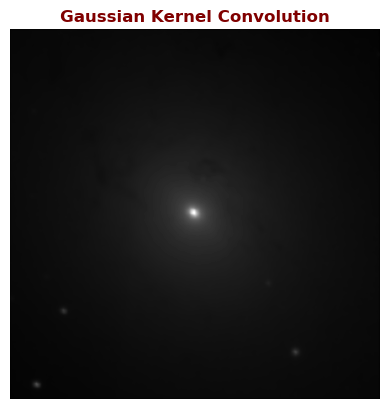

In [62]:
# Visualize the gausian kernel convolved output
plot_pixels(gaussian_convolved_image, title='Gaussian Kernel Convolution', color='maroon')

In [63]:
# Get the ZScaleInterval from visualization module of astropy
from astropy.visualization import ZScaleInterval

In [64]:
# Log Normalization is simply the log of pixels! Create a function for the same!
def log_normalization(pixel_array):
  return np.log(pixel_array)

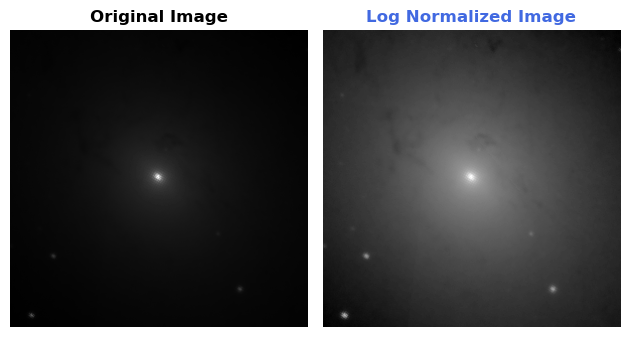

In [65]:
# Visualize the log normalization on M31 data
log_norm_array = log_normalization(M31_Pixels)
compare_pixels(log_norm_array, title='Log Normalized Image')


In [66]:
# Create the object for ZScaleInterval
z = ZScaleInterval()
# Get min and max values of the M31 data
z1, z2 = z.get_limits(log_norm_array)
# Check z1 and z2
print(f'Minimum = {z1}')
print(f'Maximum = {z2}')

Minimum = 1.6889997720718384
Maximum = 4.447910199027211


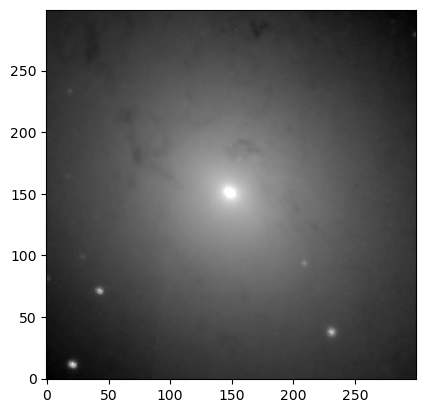

In [67]:
# Plot the M31 data using this interval
img = plt.imshow(log_norm_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show()

In [68]:
# Get the array created from the above cell
image_array = img.make_image(renderer=None, unsampled=True)[0]

In [69]:
# Convert 4 channel image to grayscale image
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY)

In [70]:
grayscale_zint_array=gray_array

In [71]:
# Using grayscalel of M31 data to convolve with gaussian kernel
convolved_grayscale = convolve2d(grayscale_zint_array, gaussian_kernel, mode='same')

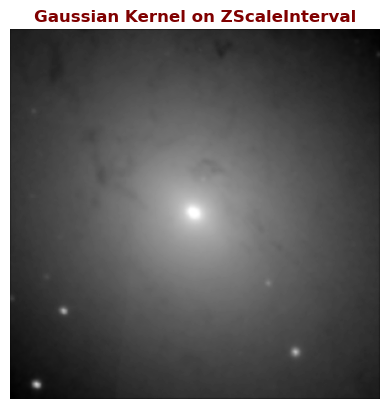

In [72]:
# Check how this looks now!
plot_pixels(convolved_grayscale, title='Gaussian Kernel on ZScaleInterval', color='maroon')

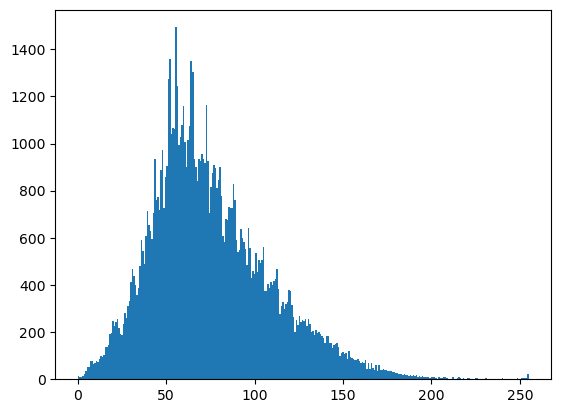

In [73]:
# Get the histogram
plt.hist(convolved_grayscale.flat, bins=300)
plt.show()

## Enhancing the Linear Features on M31
Take a look onto different available filters in skimage:-
https://scikit-image.org/docs/stable/api/skimage.filters.html

In [74]:
# Create spectral list to use later
SPECTRAL_LIST = ["gray","jet","hot","prism","nipy_spectral"]

In [75]:
# Import meijering and sato filters from skimage
from skimage.filters import meijering, sato

In [76]:
# Implement these filters on the convolved image
meijering_output = meijering(convolved_grayscale)
sato_output = sato(convolved_grayscale)

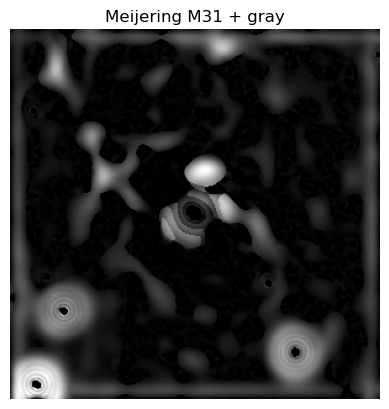

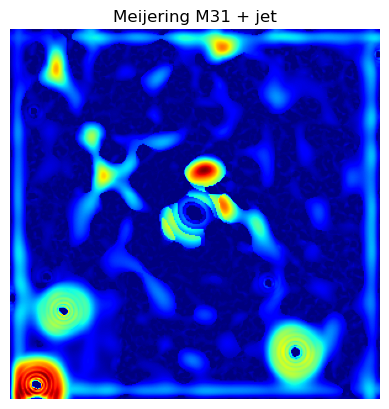

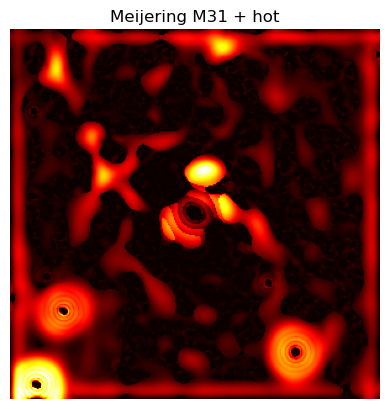

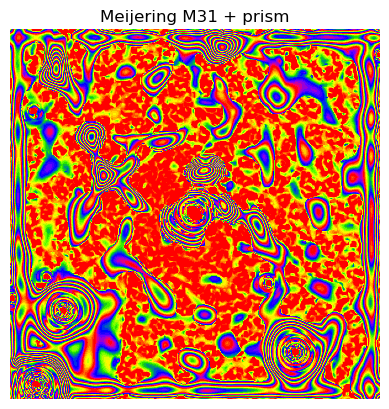

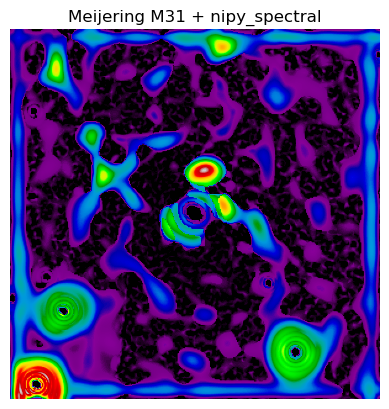

In [77]:
# For each element in the spectral list visulize the output for the meijering filer!
for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output, cmap=colormap, origin='lower')
  plt.title(f'Meijering M31 + {colormap}')
  plt.axis('off')
  plt.show()

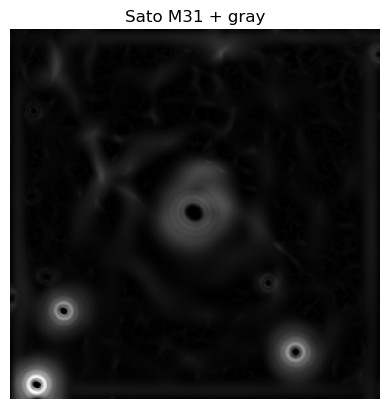

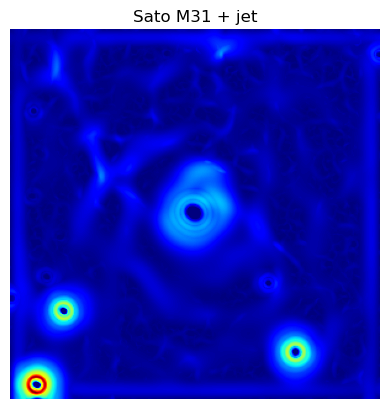

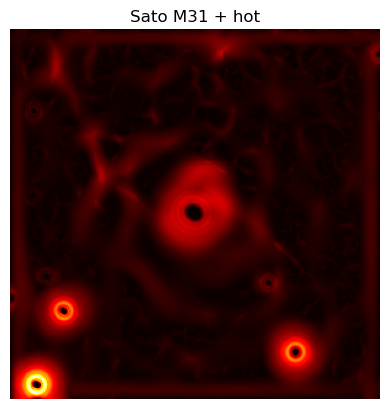

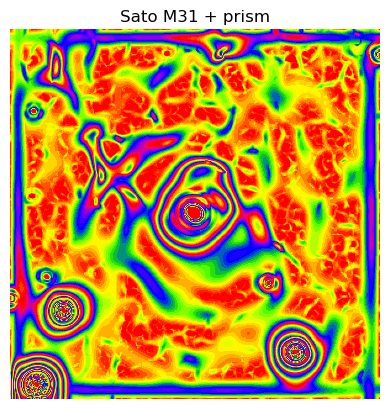

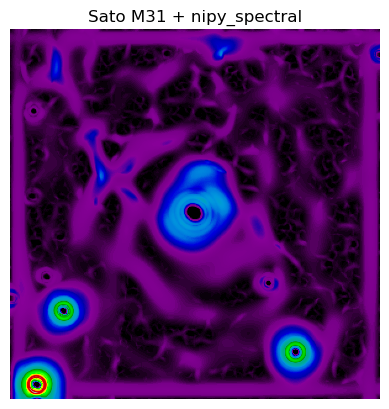

In [78]:
# For each element in the spectral list visulize the output for the sato filer!
for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output, cmap=colormap, origin='lower')
  plt.title(f'Sato M31 + {colormap}')
  plt.axis('off')
  plt.show()


## Feature Detection and Extraction

skiamge different features:- https://scikit-image.org/docs/stable/api/skimage.feature.html

Skimage Feature used for Feature detection and extraction, e.g., texture analysis corners, etc.

### corner_foerstner

A fast operator for detection and precise location of distinct points, corners and centres of circular features

In [79]:
# Import feature module from skimage
from skimage.feature import corner_foerstner

In [80]:
# log_scaled pixels or standard scale pixes or Normalized pixels
feature_output = corner_foerstner(convolved_grayscale)

In [81]:
# Check the output of the featured image
feature_output[1]

array([[0.4989641 , 0.21946652, 0.20260812, ..., 0.24883013, 0.65938198,
        0.71467819],
       [0.39800763, 0.23215066, 0.14497339, ..., 0.54766745, 0.90813068,
        0.66235114],
       [0.24457695, 0.17733225, 0.10416085, ..., 0.98735337, 0.55825765,
        0.25356002],
       ...,
       [0.22429728, 0.51726484, 0.96709646, ..., 0.6867379 , 0.62290977,
        0.29146722],
       [0.64334682, 0.9009524 , 0.55832027, ..., 0.49465811, 0.75665701,
        0.5648419 ],
       [0.71794373, 0.66759447, 0.2532344 , ..., 0.24465286, 0.53700323,
        0.60483135]])

In [82]:
# Type of the featured image
type(feature_output)

tuple

In [83]:
# Check the length of the tuple
len(feature_output)

2

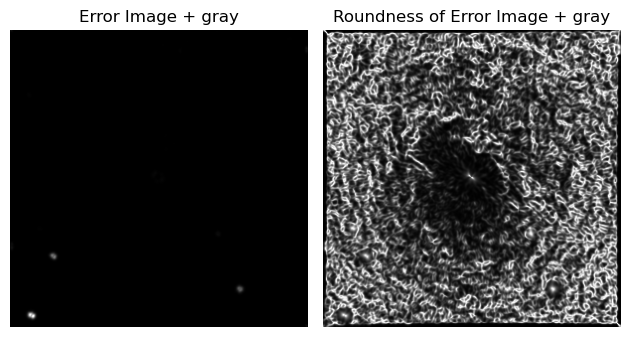

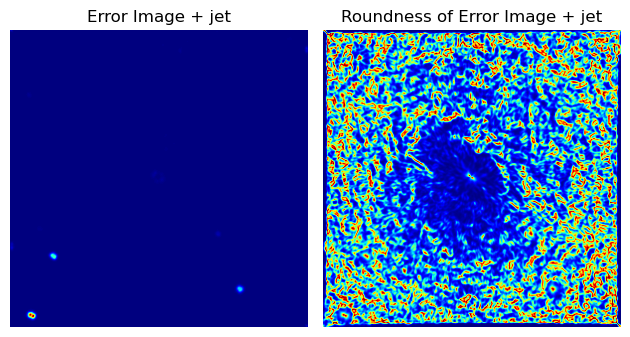

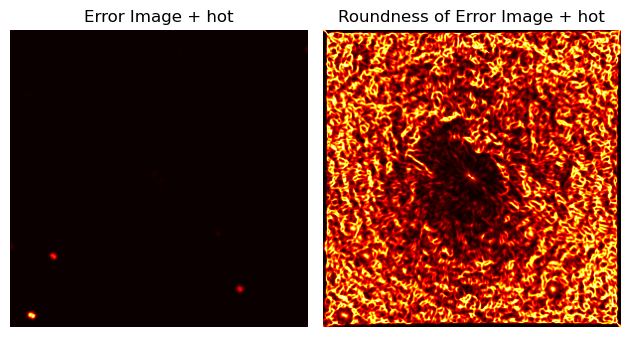

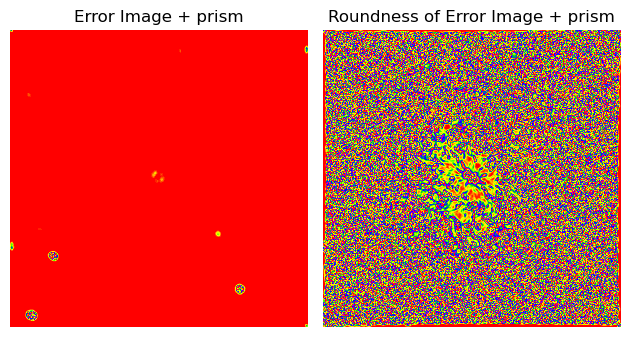

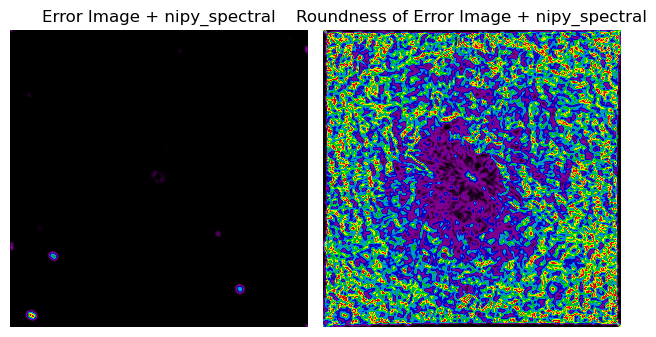

In [84]:
# Subplot Visualization
for colormap in SPECTRAL_LIST:
  plt.subplot(1, 2, 1)
  plt.imshow(feature_output[0], cmap=colormap, origin='lower')
  plt.title(f'Error Image + {colormap}')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(feature_output[1], cmap=colormap, origin='lower')
  plt.title(f'Roundness of Error Image + {colormap}')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

### multiscale_basic_features (Local Features)

In [85]:
# Import this feature
from skimage.feature import multiscale_basic_features

In [86]:
# Generate again a new featured image
featured_image = multiscale_basic_features(convolved_grayscale)

In [87]:
# Get type
type(featured_image)

numpy.ndarray

In [88]:
# Shape
featured_image.shape

(300, 300, 24)

In [89]:
# Storing each and every channel from P1 to P24
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(featured_image)

In [90]:
# Check P1
P1.shape

(300, 300)

In [91]:
# What about last one - P24
P24.shape

(300, 300)

In [92]:
# Create list of these pixels for each channel
Pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

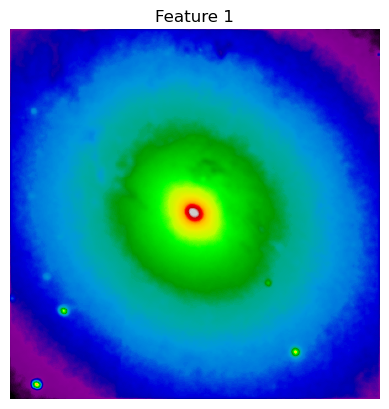

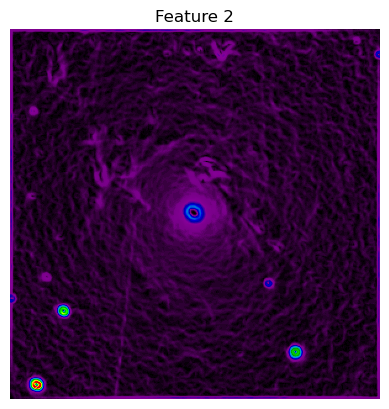

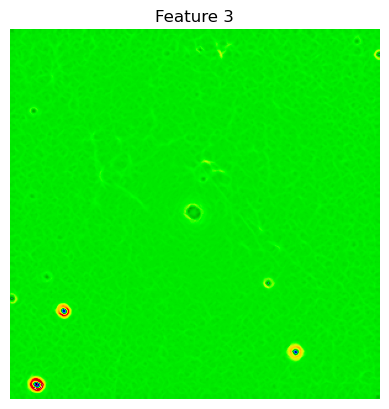

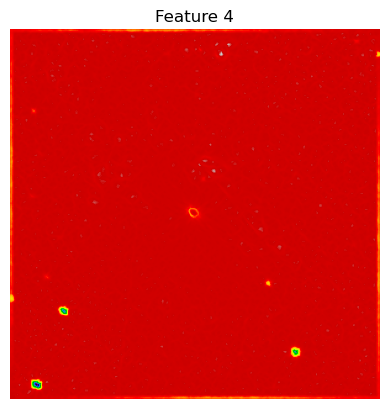

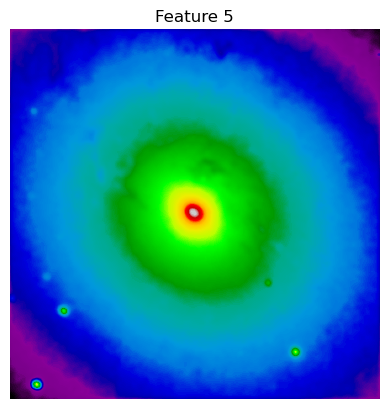

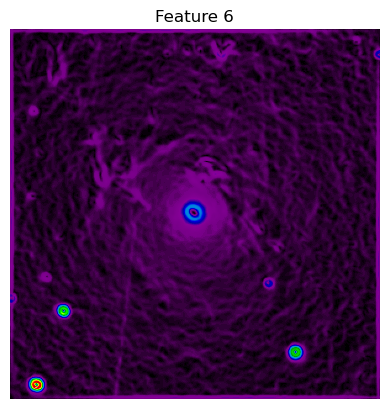

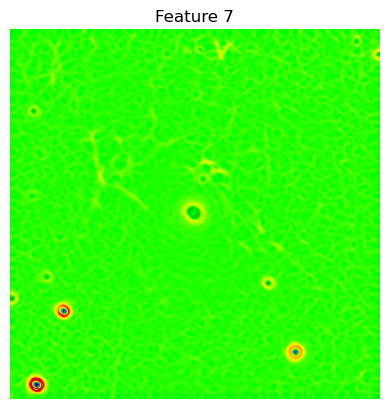

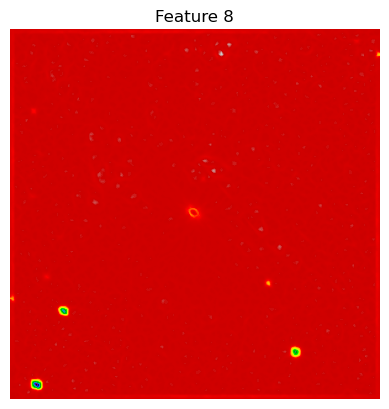

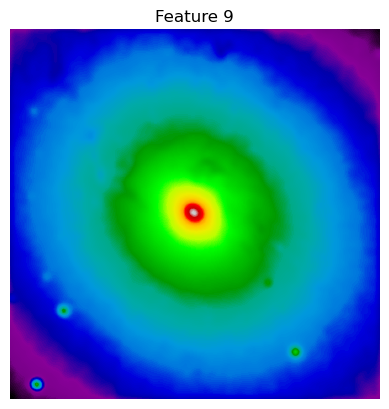

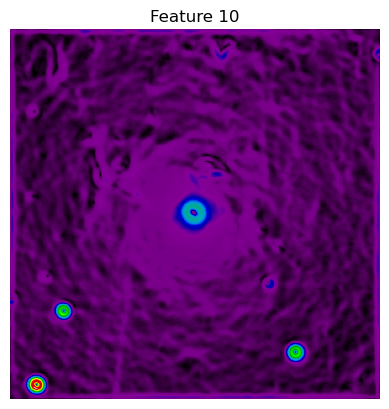

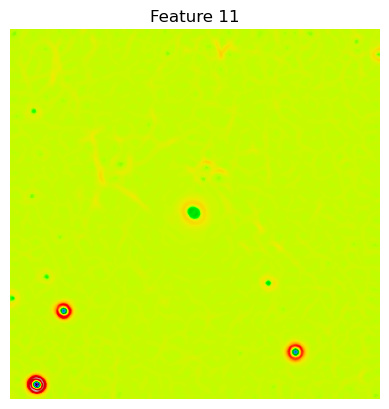

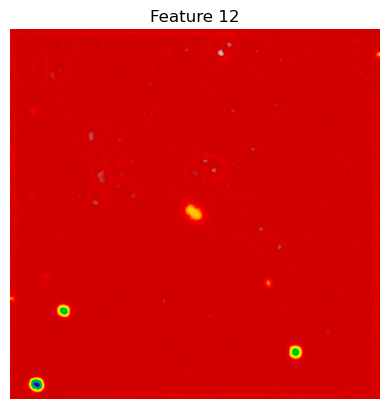

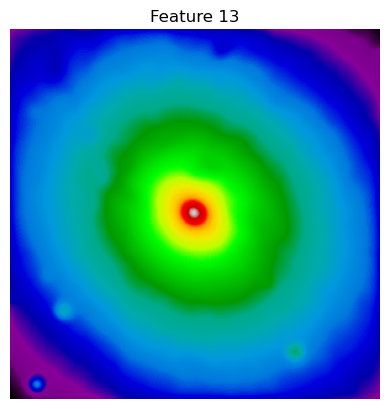

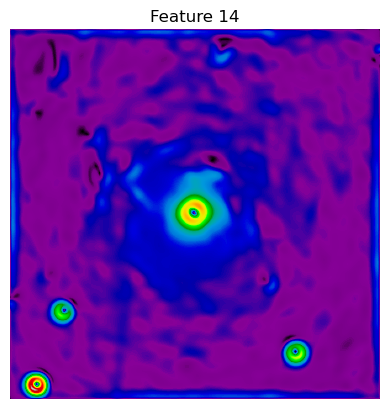

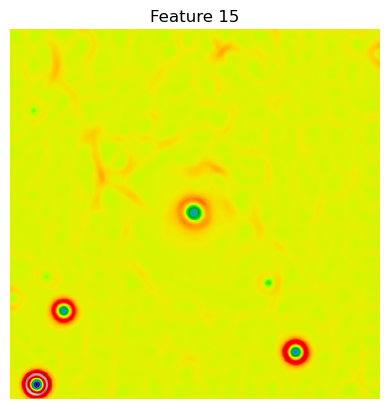

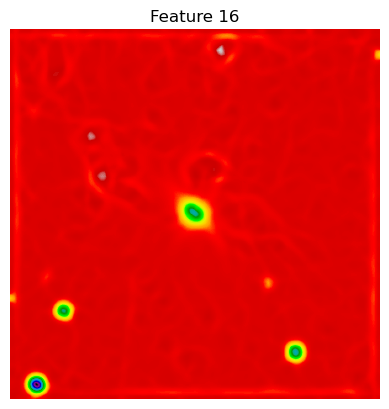

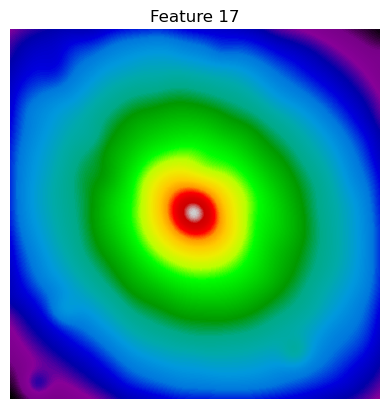

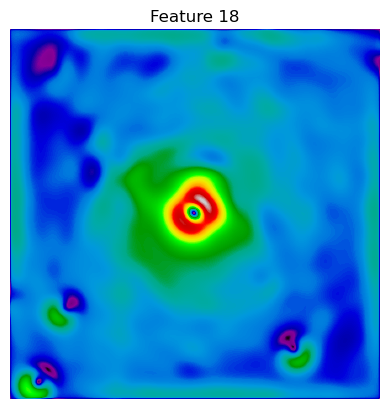

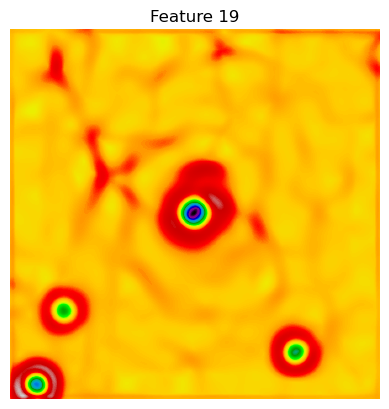

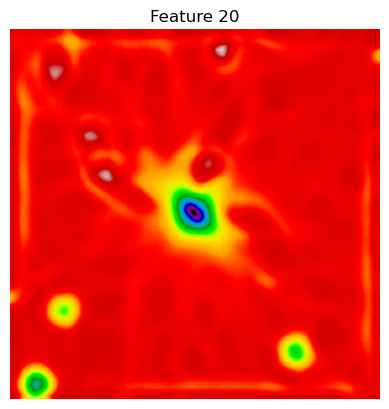

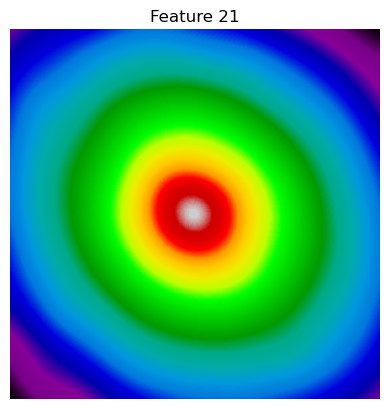

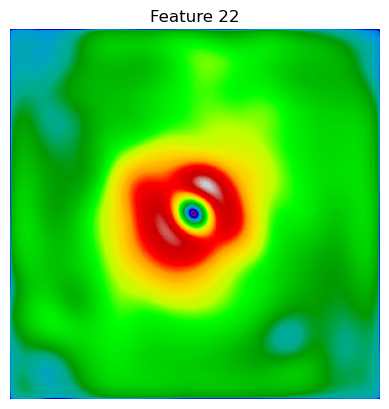

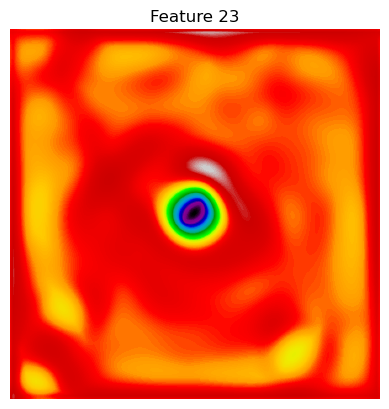

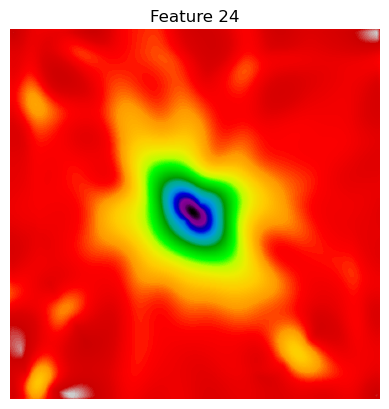

In [93]:
# Visualize each channel using prism spectral
for i, feature in enumerate(Pixels):
  plt.imshow(feature, cmap='nipy_spectral', origin='lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show()